In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
sns.set()

In [2]:
# !wget https://raw.githubusercontent.com/mtfr1/FIFA19-dataset/master/data.csv --quiet
df = pd.read_csv('data.csv')

In [3]:
# features = ['Name','Position', 'Crossing', 'Finishing',
#        'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
#        'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
#        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
#        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
#        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
#        'Marking', 'StandingTackle']

#features associadas à habilidade dos jogadores
features = ['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle']

## Sklearn PCA com Goleiros

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('data.csv')

df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKRefl

In [6]:
features = ['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

numeric_features = ['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle']

In [7]:
n = len(features)
df_pca = df.copy()
df_cluster = df.copy()
df_pca = df_pca[features].dropna()
df_cluster = df_cluster.dropna(subset=features)
#df_pca = df_pca[df_pca.columns.difference(['Name','Position'])]
labels = df_pca.columns

X_std = StandardScaler().fit_transform(df_pca)
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(X_std)

In [8]:
pcs = pd.DataFrame(pca.components_.T, columns=["PC"+str(i+1) for i in range(n)], index=labels)

def filt(x):
    if x >= 0.15:
        return x
    if x <= -0.15:
        return x

pcs = pcs.iloc[:,:4]

In [9]:
#PC1 -> pesos negativos para todos os atributos, exceto para aqueles relativos à posição de goleiro, logo esse PC é
# responsável por separar os goleiros dos outros atletas

#PC2 -> pesos negativos para atributos relacionados à velocidade (Agilidade, Aceleração, Velocidade de Corrida) e
# pesos positivos para Desarmes, Carrinhos, Agressividade, Marcação 
# parece estar favorencendo os atletas mais defensivos

#PC3 -> Reactions Strenght Vision Composure,
# pesos negativos para velocidade

#PC4 -> Pesos positivos para HeadingAccuracy Volleys Finishing Strenght Penalties, que são atributos relacionados
# a jogadores ofensivos, negativos para LongPassing, Acceleration, Agilidade, Balance

In [10]:
y = []
features = list(range(1, n))
for i in features:
    pca_graph = PCA(n_components=i)
    pca_graph = pca_graph.fit(X_std)
    y.append(pca_graph.explained_variance_ratio_.sum())

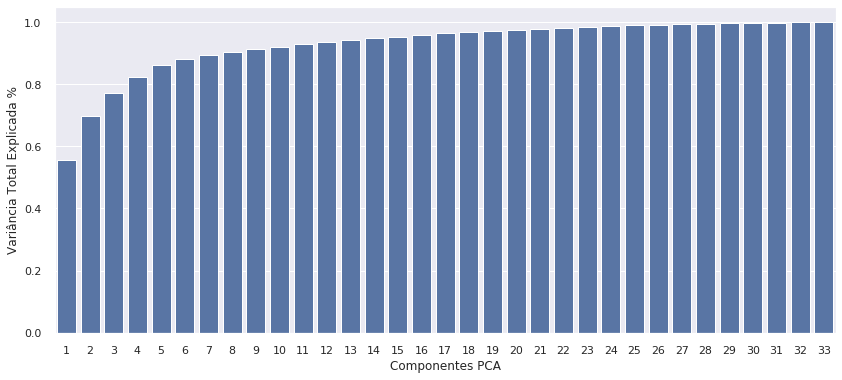

In [11]:
plt.figure(figsize=(14,6))
sns.barplot(features, y, color='b')
plt.xlabel('Componentes PCA')
plt.ylabel('Variância Total Explicada %')
plt.show()

In [12]:
i = 4
print("Variância explicada pelos", i, "primeiros componentes", sum(pca.explained_variance_ratio_[:i]))

Variância explicada pelos 4 primeiros componentes 0.8228323680247314


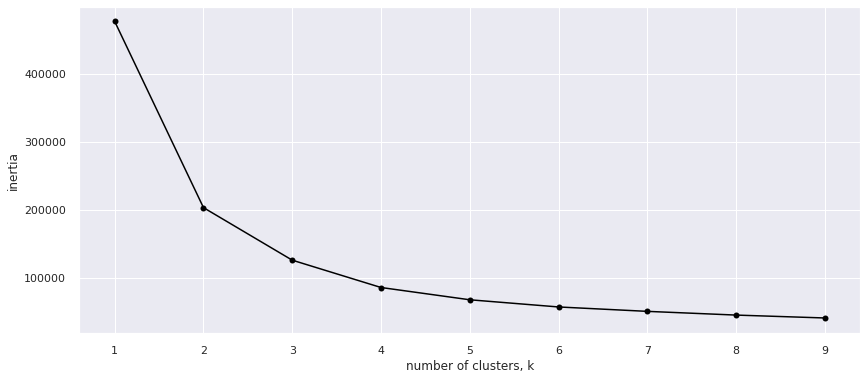

In [13]:
PCA_components = pd.DataFrame(principalComponents)
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3])
    inertias.append(model.inertia_)

plt.figure(figsize=(14,6))
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [14]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(principalComponents)

In [15]:
model = KMeans(n_clusters=2)
model.fit(PCA_components)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
y_kmeans = model.predict(PCA_components)

In [17]:
PCA_sample = PCA_components.sample(n=3000, random_state=42)
y_sample = y_kmeans[PCA_sample.index]

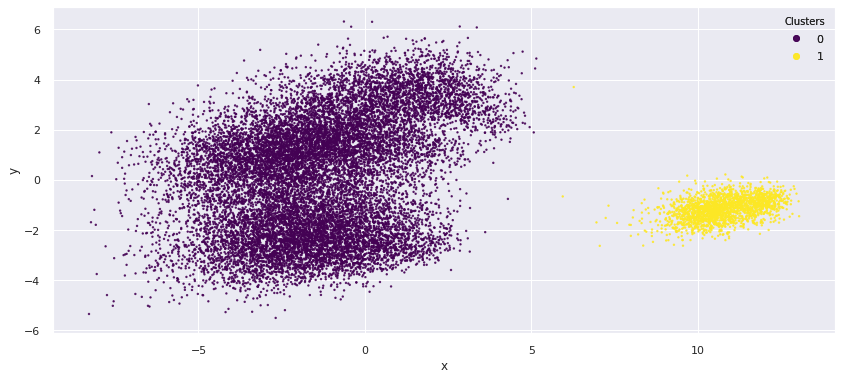

In [21]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)

x = PCA_components.iloc[:, 0] #component_1
y = PCA_components.iloc[:, 1] #component_2

scatter = ax.scatter(x, y,c=y_kmeans, cmap='viridis', s=2, alpha=.8)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")

ax.add_artist(legend1)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

# Cluster sem Meio

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
sns.set()

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [93]:
df = pd.read_csv('data.csv')

In [94]:
features = ['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [95]:
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM') | (df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM') | (df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'MF'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

df['Simple Position'] = df.apply(simple_position, axis=1)
df = df.drop(['Position'], axis=1)
df.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Simple Position
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,ST
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,ST
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,MF
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,GK
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,MF


In [96]:
n = len(features)
df_pca = df.copy()
df_cluster = df.copy()
df_pca = df_pca[df_pca["Simple Position"] != "MF"]
df_cluster = df_cluster[df_cluster["Simple Position"] != "MF"]
df_pca = df_pca[features].dropna()
df_cluster = df_cluster.dropna(subset=features)
labels = df_pca.columns

X_std = StandardScaler().fit_transform(df_pca)
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(X_std)

In [97]:
pcs = pd.DataFrame(pca.components_.T, columns=["PC"+str(i+1) for i in range(n)], index=labels)

pcs.iloc[:,:4]

,PC1,PC2,PC3,PC4
Crossing,-0.192980,0.000267,0.010913,-0.193558
Finishing,-0.166462,0.271516,-0.013131,0.162432
HeadingAccuracy,-0.192391,-0.093411,0.024358,0.258338
ShortPassing,-0.204409,-0.034099,0.113605,-0.021446
Volleys,-0.175975,0.224694,0.039603,0.140249
Dribbling,-0.206880,0.100742,-0.043332,-0.043367
Curve,-0.190551,0.122246,0.058912,-0.060380
FKAccuracy,-0.177860,0.100549,0.092215,-0.008585
LongPassing,-0.177325,-0.096109,0.194793,-0.108485
BallControl,-0.213516,0.042040,0.025854,0.014765


In [129]:
pc1 = pcs.iloc[:,:1]
pc1 = pc1[(pc1.PC1 >= 0.15) | (pc1.PC1 <= -0.20)]
pc1

,PC1
ShortPassing,-0.204409
Dribbling,-0.206880
BallControl,-0.213516
GKDiving,0.197447
GKHandling,0.197279
GKKicking,0.196722
GKPositioning,0.196445
GKReflexes,0.197233


In [130]:
pc2 = pd.DataFrame(pcs.iloc[:,1])
pc2 = pc2[(pc2.PC2 >= 0.15) | (pc2.PC2 <= -0.15)]
pc2 = pd.DataFrame(pc2["PC2"].apply(lambda x: -x))
pc2

,PC2
Finishing,-0.271516
Volleys,-0.224694
LongShots,-0.203423
Aggression,0.202510
Interceptions,0.348607
Positioning,-0.192547
Vision,-0.201982
Penalties,-0.193445
Marking,0.335418
StandingTackle,0.359733


In [131]:
pc3 = pd.DataFrame(pcs.iloc[:,2])
pc3 = pc3[(pc3.PC3 >= 0.15) | (pc3.PC3 <= -0.15)]
pc3

,PC3
LongPassing,0.194793
Acceleration,-0.188873
SprintSpeed,-0.162241
Reactions,0.496890
Balance,-0.217351
Strength,0.312142
Vision,0.234921
Composure,0.373516
GKDiving,0.209222
GKHandling,0.211461


In [132]:
pc4 = pd.DataFrame(pcs.iloc[:,3])
pc4 = pc4[(pc4.PC4 >= 0.15) | (pc4.PC4 <= -0.20)]
pc4

,PC4
Finishing,0.162432
HeadingAccuracy,0.258338
Acceleration,-0.272968
SprintSpeed,-0.231964
Agility,-0.317657
Balance,-0.367233
ShotPower,0.162000
Strength,0.371726
Penalties,0.180116


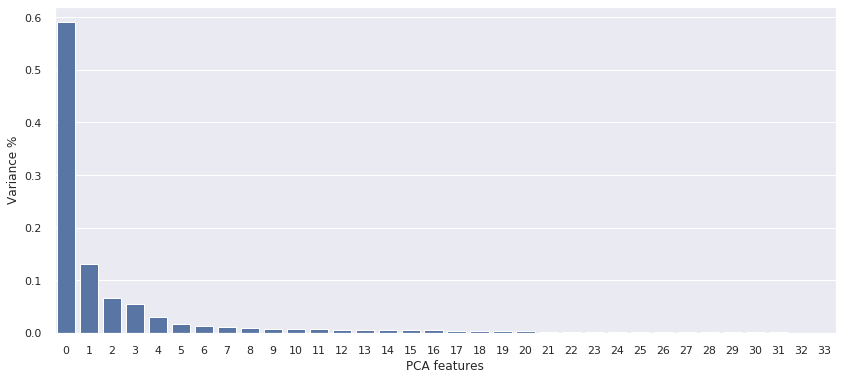

In [98]:
plt.figure(figsize=(14,6))
features = list(range(pca.n_components_))
sns.barplot(features, pca.explained_variance_ratio_, color='b')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)
plt.show()

In [99]:
i = 4
print("Variância explicada pelos", i, "primeiros componentes", sum(pca.explained_variance_ratio_[:i]))

Variância explicada pelos 4 primeiros componentes 0.8414477006179062


In [100]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

In [101]:
pca = PCA(n_components=3)
X = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(X)

In [117]:
n_components_range = range(1, 8)
bic = []
for i in n_components_range:
        gmm = mixture.GaussianMixture(n_components=i)
        gmm.fit(X)
        bic.append(gmm.bic(X))
bic = np.array(bic)

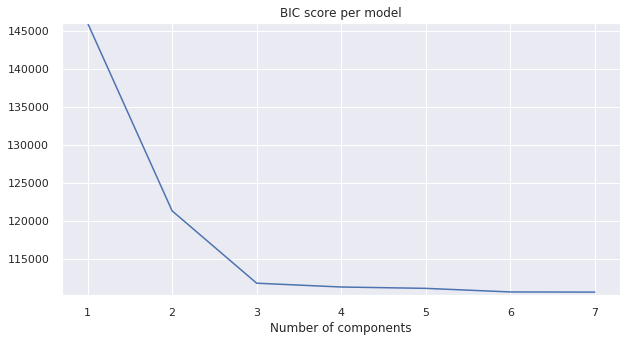

In [119]:
plt.figure(figsize=(10, 5))
sns.lineplot(n_components_range, bic)
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range))  +\
     .2 * np.floor(bic.argmin() / len(n_components_range))

plt.xlabel('Number of components')
plt.show()

In [120]:
model = mixture.GaussianMixture(n_components=3)
model.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [121]:
y_em = model.predict(X)

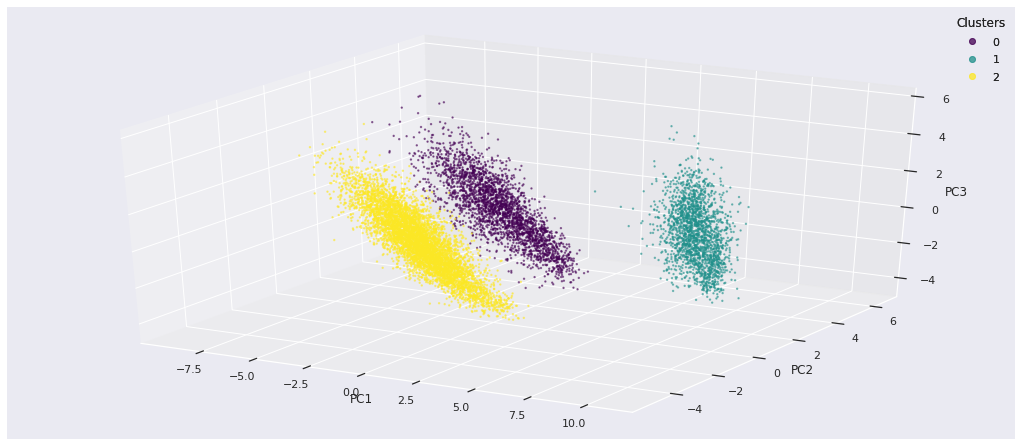

In [122]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,6))
#ax = fig.add_subplot(111)
ax = Axes3D(fig)
x = PCA_components.iloc[:, 0] #component_1
y = PCA_components.iloc[:, 1] #component_2
z = PCA_components.iloc[:, 2] #component_3


scatter = ax.scatter(x, y, z, c=y_em, cmap='viridis', s=2, alpha=.5)


legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")

ax.add_artist(legend1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

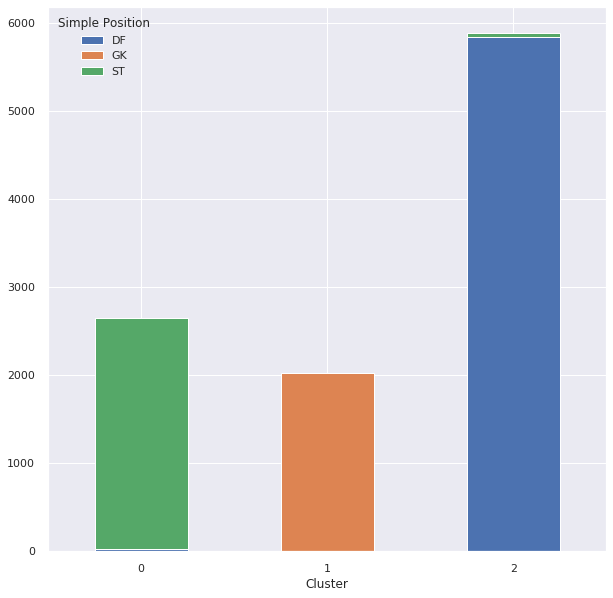

In [123]:
df_cluster["Cluster"] = y_em
df_cluster = df_cluster.loc[:, ["Simple Position", "Cluster"]]
gp_clusters = df_cluster.groupby('Cluster')
a = df_cluster.groupby(['Cluster','Simple Position']).size()
a.unstack(level=-1).plot(kind='bar',stacked=True, figsize = (10,10))
plt.xticks(rotation=0)
plt.show()

In [124]:
from sklearn.metrics import silhouette_score

In [125]:
silhouette_score(X, y_em)

0.46705454283708675

In [126]:
model = KMeans(n_clusters = 3)
model.fit(X)
y_kmeans = model.predict(X)

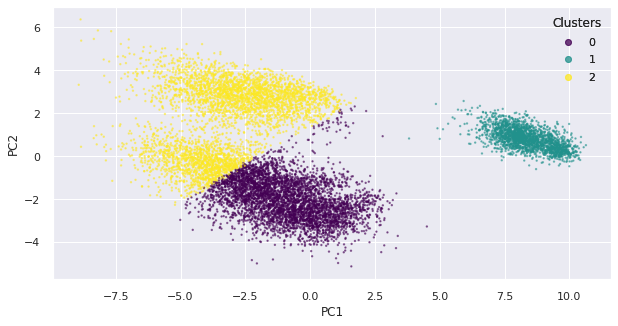

In [128]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
x = PCA_components.iloc[:, 0] #component_1
y = PCA_components.iloc[:, 1] #component_2

scatter = ax.scatter(x, y, c=y_kmeans, cmap='viridis', s=2, alpha=.5)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")

ax.add_artist(legend1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()